# Multi-Armed-Bandits-for-Recommendations-and-A-B-testing

## Introduction

The notebook helps to analyze the out of different algorithms. The recommendations are done by the UCD, Thomspon sampling, and Epsilon greedy of the multi-arm bandit and the A/B testing Compared to understand the difference between them.

In [15]:
# import necessary libraries

import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# Reading the results of different algorithims

These are the csv files generated by using offline replay
with 4 of types algos like

1. Epsilon Greedy
2. Upper confidence Bound
3. Thompson Sampling
4. A/B Testing

In [6]:
'''
The Csv files present in current 
output run directory are Read 
for all the algos

'''

ucb_results_df = pd.read_csv('./output/2020-12-17 02:49:49.992676/ucb_results_df.csv')
thompson_results_df = pd.read_csv('./output/2020-12-11 09:42:28.549015/thompson_results_df.csv')
epsilon_results_df = pd.read_csv('./output/2020-12-11 09:42:28.549015/epsilon_results_df.csv')
ab_results_df = pd.read_csv('./output/2020-12-11 09:42:28.549015/ab_results_df.csv')

'''
unwanted index column is dropped
'''

try:
    ucb_results_df = ucb_results_df.drop('Unnamed: 0',axis = 1)
    thompson_results_df = thompson_results_df.drop('Unnamed: 0',axis = 1)
    epsilon_results_df = epsilon_results_df.drop('Unnamed: 0',axis = 1)
    ab_results_df = ab_results_df.drop('Unnamed: 0',axis = 1)
    print("Unwanted column removed")
except:
    pass

In [9]:
'''
Grouping the each data frame with visit with mean
'''

ucb_avg_results_df = ucb_results_df.groupby('visit', as_index=False).mean()

thompson_avg_results_df = thompson_results_df.groupby('visit', as_index=False).mean()

epsilon_avg_results_df = epsilon_results_df.groupby('visit', as_index=False).mean()

ab_avg_results_df = ab_results_df.groupby('visit', as_index=False).mean()

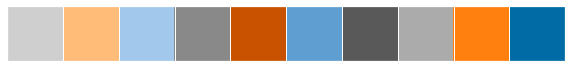

In [12]:

# using a color-blind friendly palette with 10 colors
color_blind_palette_10 = ['#cfcfcf', '#ffbc79', '#a2c8ec', '#898989', '#c85200',
                          '#5f9ed1', '#595959', '#ababab', '#ff800e', '#006ba4']

sns.palplot(color_blind_palette_10)

/home/maheshwarappa.a/miniconda3/envs/RL-project/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


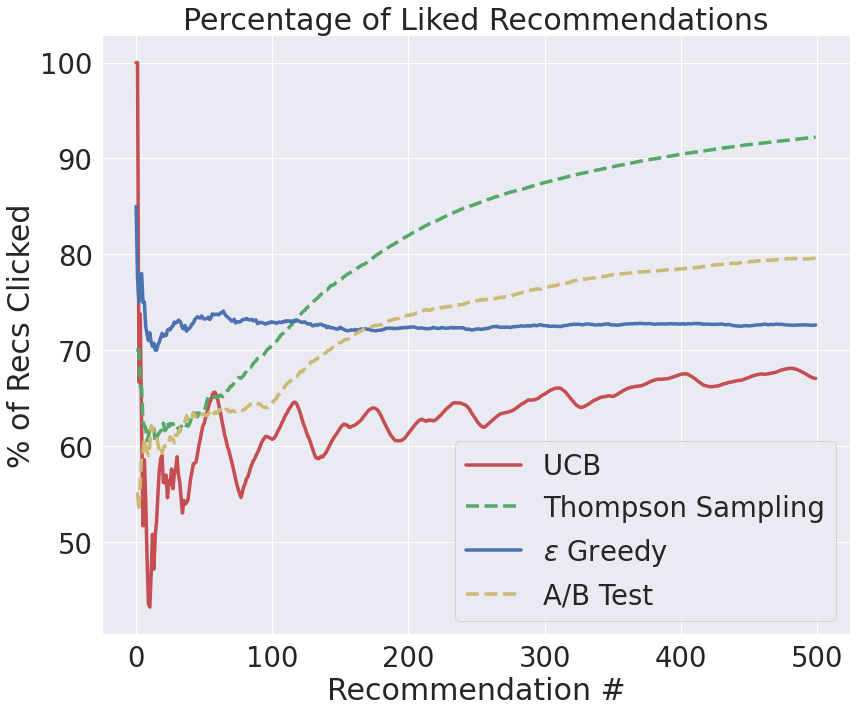

In [19]:
fig, ax = plt.subplots(figsize=(12,10))

for (avg_results_df, style) in [(ucb_avg_results_df, 'r-'),
                                (thompson_avg_results_df, 'g--'),
                                (epsilon_avg_results_df, 'b-'),
                                (ab_avg_results_df, 'y--')]:
    
    ax.plot(avg_results_df.visit, avg_results_df.fraction_relevant, style, linewidth=3.5)


ax.set_title('Percentage of Liked Recommendations')
ax.set_xlabel('Recommendation #')
ax.set_ylabel('% of Recs Clicked')

#ax.set_xticks(range(0,22000,5000))
#ax.set_ylim(0.2, 0.6)
#ax.set_yticks(np.arange(0.2, 0.7, 0.1))

#rescale the y-axis tick labels to show them as a percentage
ax.set_yticklabels((ax.get_yticks()*100).astype(int))

ax.legend(['UCB ',
           'Thompson Sampling',
           '$\epsilon$ Greedy',
           'A/B Test'
          ],
          loc='lower right'
         )

plt.tight_layout()
plt.show()